In [1]:
!rm -rf DL_Data_sets/
!git clone --branch images https://github.com/octavio-navarro/DL_Data_sets.git

Cloning into 'DL_Data_sets'...
remote: Enumerating objects: 64969, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (491/491), done.
remote: Total 64969 (delta 13), reused 493 (delta 9), pack-reused 64469 (from 1)
Receiving objects: 100% (64969/64969), 1.54 GiB | 25.63 MiB/s, done.
Resolving deltas: 100% (136/136), done.


# Histograms

A histogram represents the distribution of pixel intensities (whether color or gray scale) in an image. It can be visualized as a graph (or plot)
that gives a high-level intuition of the **intensity (pixel value) distribution**.

An histogram can have many dimensions but in practice, 1D and 2D histograms are most often used. We define the histogram by describing its bins. The bins are baskets that count the number of entries with a value falling within the bin range.

In [2]:
import numpy as np
import cv2

import matplotlib.pyplot as plt

In [3]:
values = np.random.random_sample((100,))
print(values)
print(f"Max value: {np.max(values)}, Min value: {np.min(values)}")

[0.67430887 0.29821913 0.83405789 0.39128279 0.95479111 0.1319932
 0.01366863 0.50092222 0.39948    0.46089079 0.17887489 0.32020974
 0.83129155 0.391648   0.18373835 0.88830061 0.1393525  0.70552249
 0.42085798 0.55554188 0.2963111  0.42041975 0.56316365 0.45518807
 0.51884018 0.34943304 0.34904865 0.60312338 0.80992336 0.7313638
 0.27525811 0.19957593 0.53304691 0.77859488 0.6995115  0.36599675
 0.56659189 0.57756242 0.98494895 0.53164685 0.73459968 0.03055638
 0.53639778 0.53502894 0.71180241 0.25795294 0.42264264 0.28799105
 0.85682104 0.72536325 0.31945816 0.8889465  0.59513541 0.7711718
 0.63921159 0.55856715 0.99161378 0.2343139  0.52392272 0.96233122
 0.34406581 0.65451062 0.21185746 0.97489901 0.84273846 0.72797859
 0.37835176 0.16512048 0.22109277 0.93433009 0.95024632 0.40287499
 0.18678775 0.43419999 0.97091741 0.43383239 0.26867802 0.23041969
 0.45414896 0.38898023 0.74348742 0.94290129 0.60336027 0.03042482
 0.21836066 0.10032198 0.01448584 0.43534911 0.30208557 0.1332866

## Challenge

Complete the function to calculate a histogram from a 1D array of data.

In [4]:
def histogram_1D(data, bins):
    hist_values = [0] * bins

    return hist_values

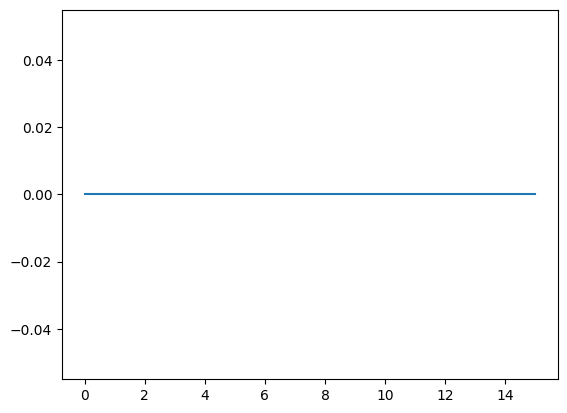

In [5]:
# Define the number of bins for the histogram
bins = 16

# Initialize an array to store the histogram values, all set to zero
histogram_values = histogram_1D(values, bins)

plt.plot(histogram_values)

plt.show()

In computer vision, a histogram represents the **distribution of pixel intensities** (whether color or gray- scale) in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. We are going to assume an RGB color space in this example, so these pixel values will be in the range of 0 to 255.

When plotting the histogram, the X-axis serves as our “bins”. If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs. In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128) or [128, 255]. The number of pixels binned to the x-axis value is then plotted on the y-axis.

By simply examining the histogram of an image, you get a general understanding regarding the **contrast, brightness, and intensity distribution**.

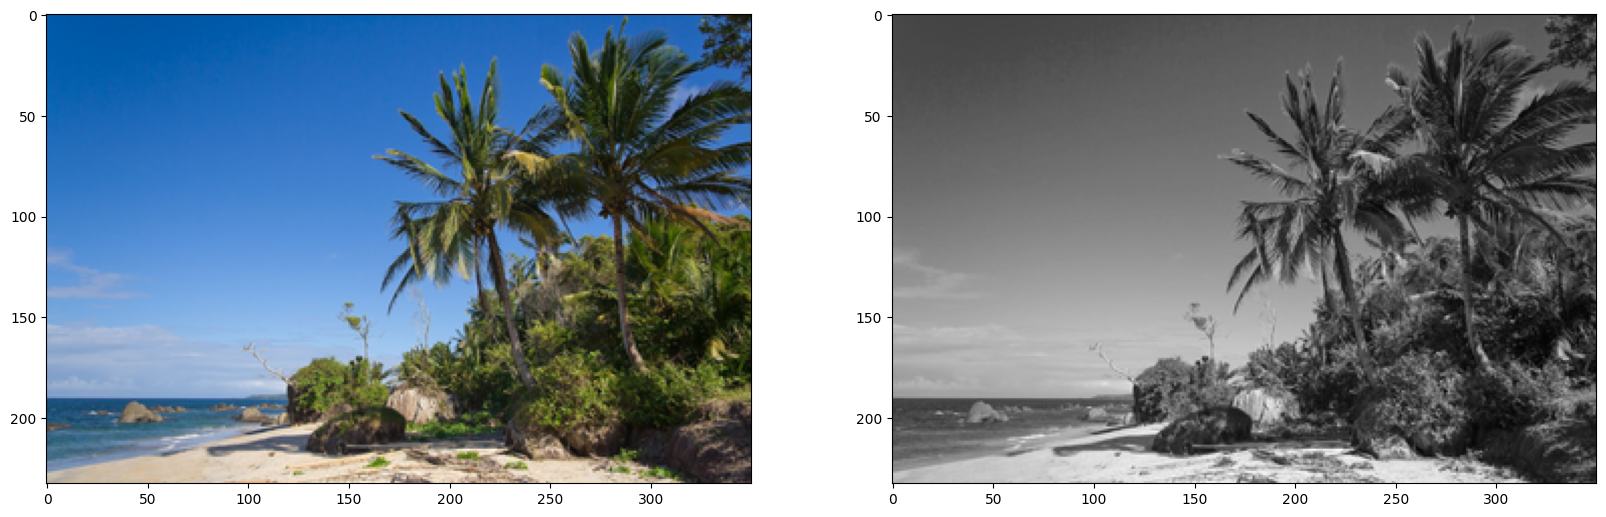

In [24]:
image = cv2.imread('/content/DL_Data_sets/images/beach.png')
# image = cv2.imread('images/olympus.jpg')


image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(gray_image, cmap = 'gray')

## Challenge

Complete the function so that you calculate the histogram of a 1 channel image.

In [25]:
def histogram_2D(image, bins):

    hist_values = [0]*bins
    h, w = image.shape

    for j in range(h):
        for i in range(w):
            hist_values[int(image[j, i])]+=1

    return hist_values

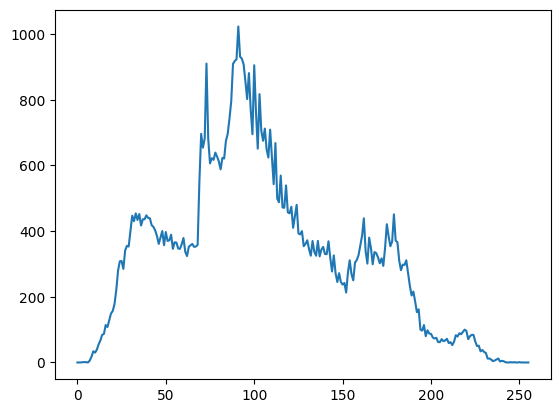

In [26]:
bins = 256
histogram_values = histogram_2D(gray_image, bins)

plt.plot(histogram_values)
plt.show()

The bins (0-255) are plotted on the x-axis. And the y-axis counts the number of pixels in each bin. The majority of the pixels fall in the range of roughly 60 to 120. Looking at the right tail of the histogram, we see very few pixels in the range 200 to 255. This means that there are very few “white” pixels in the image.

Using the same idea, we can calculate the histogram of a color image.

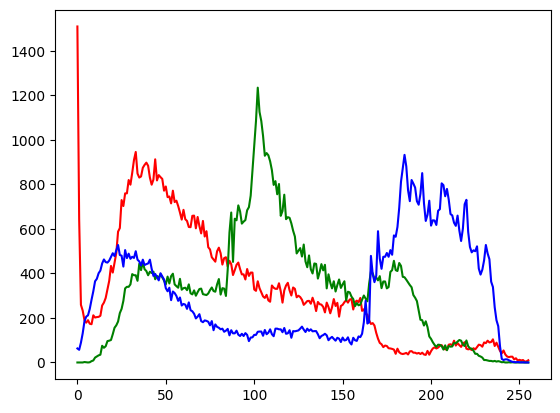

In [27]:
bins = 256
histogram_values_r = histogram_2D(image[:,:, 0], bins)
histogram_values_g = histogram_2D(image[:,:, 1], bins)
histogram_values_b = histogram_2D(image[:,:, 2], bins)

plt.plot(histogram_values_r, color = "red")
plt.plot(histogram_values_g, color = "green")
plt.plot(histogram_values_b, color = "blue")
plt.show()

We see there is a sharp peak in the green histogram around bin 100. This indicates a darker green value, from the green vegetation and trees in the beach image.We also see a lot of blue pixels in the range 170 to 225.Considering these pixels are much lighter, we know that they are from the blue sky in our beach image.

Similarly, we see a much smaller range of blue pixels in the range 25 to 50 – these pixels are much darker, and are therefore the ocean pixels in the bottom-left corner of the image.

Using OpenCV, we can use the **calcHist** function. The parameters are the following:

1. images: This is the image that we want to compute a histogram for. Wrap it as a list: [myImage].
2. channels: This is a list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0]. To compute a histogram for all three red, green, and blue channels, the channels list would be [0,1,2].
3. mask: If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None.
4. histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32,32,32].
5. ranges: Here we specify The range of possible pixel values. Normally, this is [0, 256] for each channel.

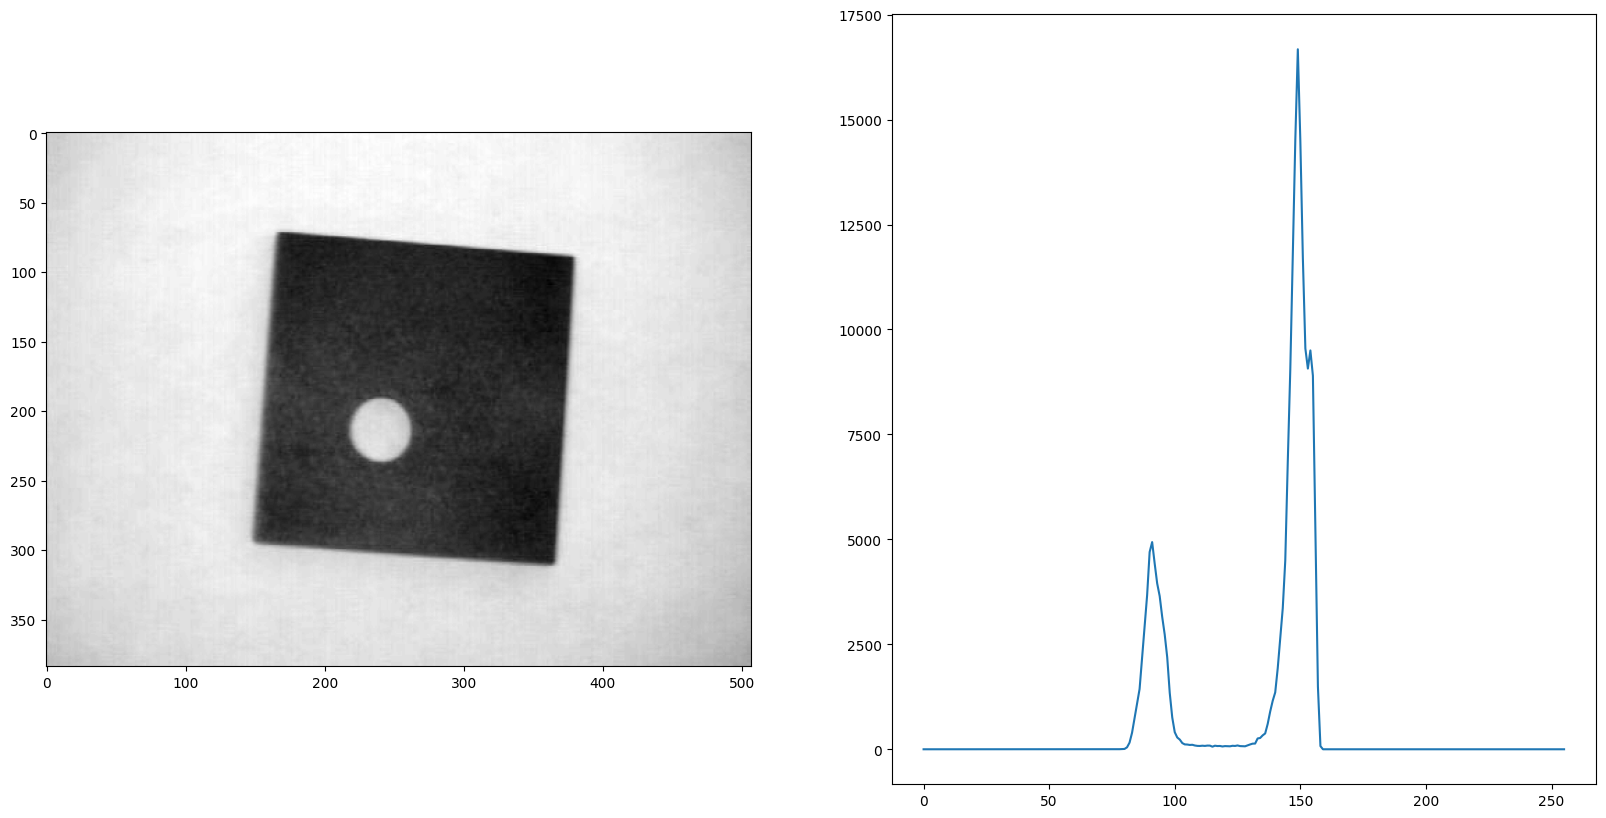

In [28]:
image = cv2.imread('/content/DL_Data_sets/images/wdg2.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image, cmap='gray')
ax2.plot(hist)

A use for histograms is to find a point where we can threshold the image appropriately. For the previous image, a value of around 120 would separate the two sections of the histogram.

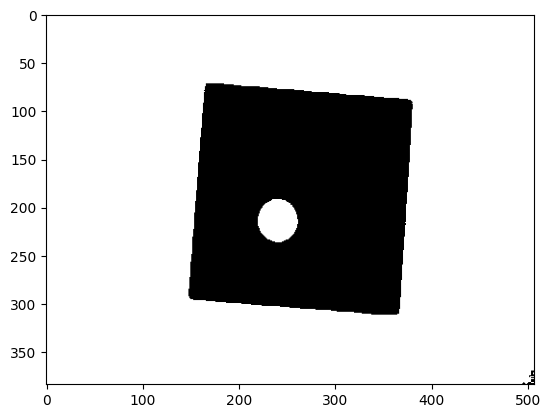

In [29]:
_, image_black = cv2.threshold(image, 130, 255, cv2.THRESH_BINARY)

plt.imshow(image_black, cmap='gray')

Another more interesting use of histograms is to adjust the contrast of images through the use of **Histogram Equalization**.

## Histogram Equalization

Histogram equalization improves the contrast of an image by “stretching” the distribution of pixels. Consider a his- togram with a large peak at the center of it. Applying his- togram equalization will stretch the peak out towards the corner of the image, thus improving the global contrast of the image. Histogram equalization is applied to grayscale images.

This method is useful when an image contains foregroun- ds and backgrounds that are both dark or both light. It tends to produce unrealistic effects in photographs; how- ever, it is normally useful when enhancing the contrast of medical or satellite images.

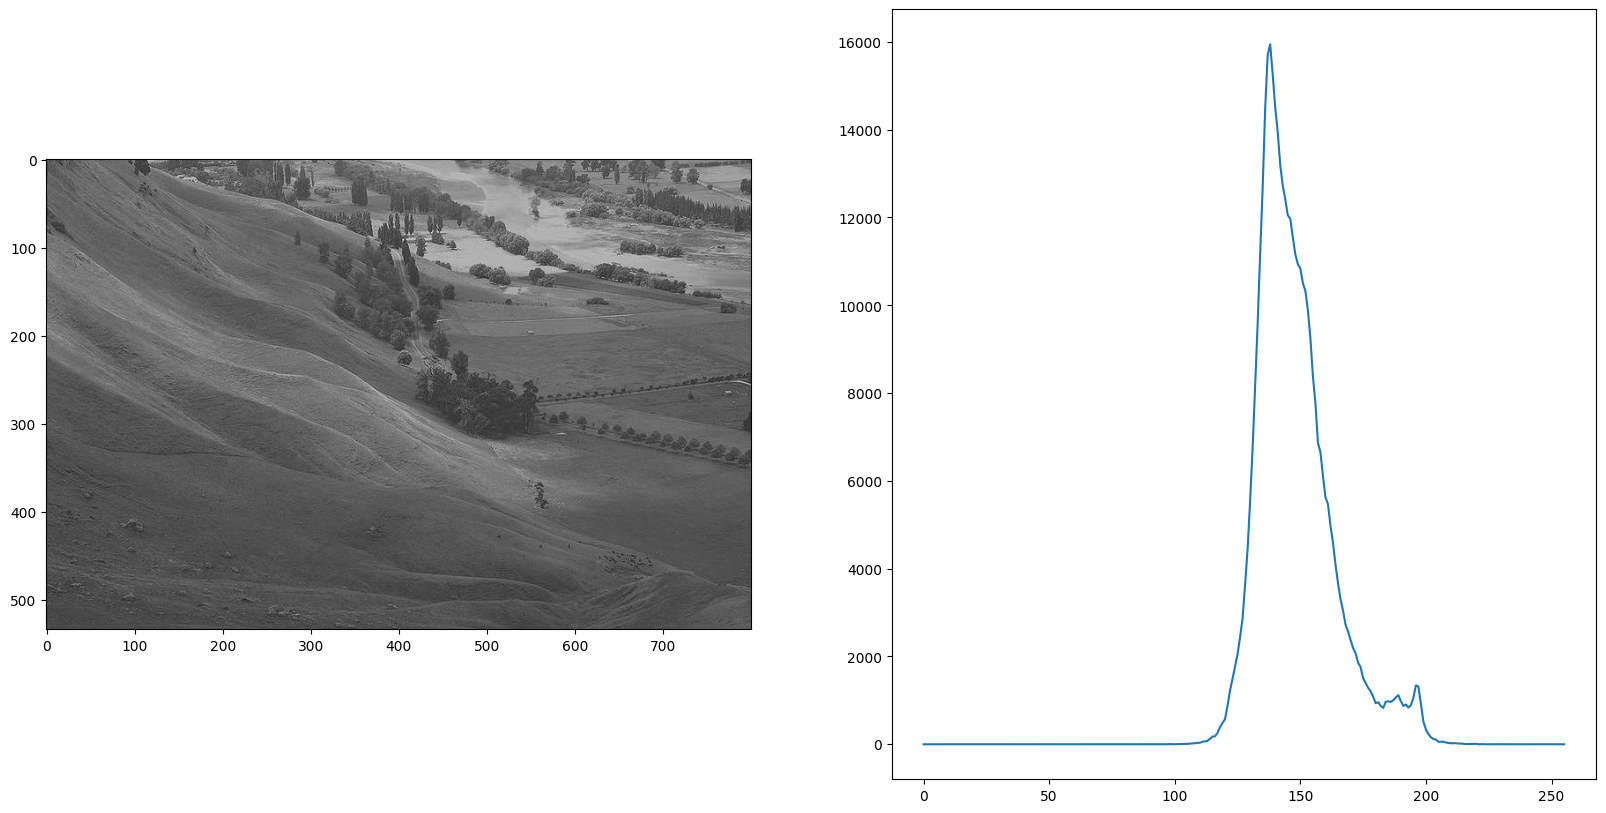

In [30]:
image = cv2.imread('/content/DL_Data_sets/images/Hawkes_Bay_NZ.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image, cmap='gray')
ax2.plot(hist)

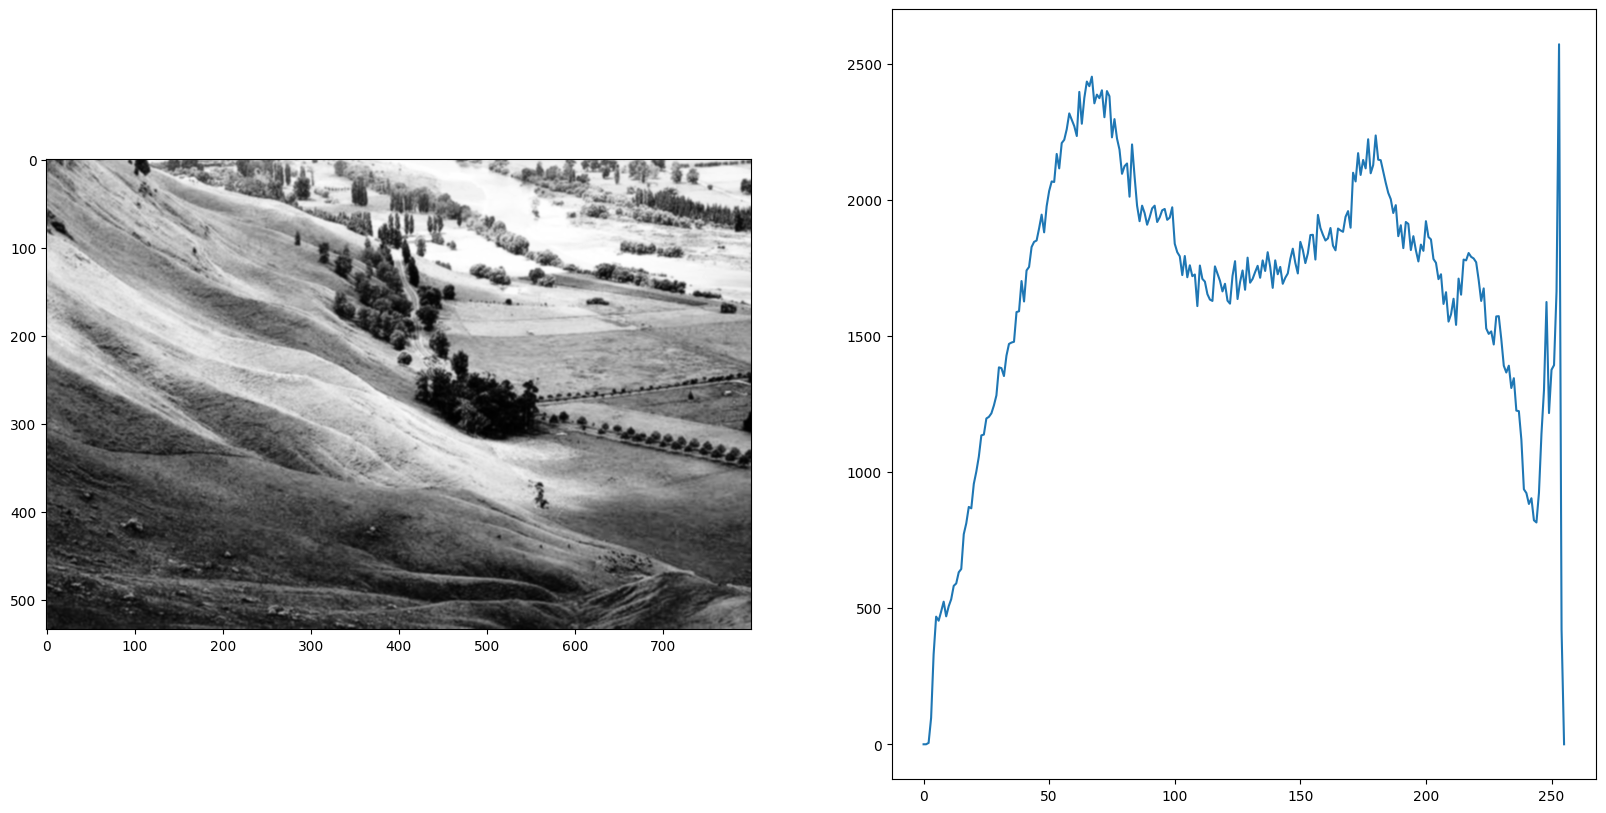

In [33]:
eq = cv2.equalizeHist(image)


blur = cv2.GaussianBlur(eq, (5, 5), 0)
hist = cv2.calcHist([blur], [0], None, [256], [0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(blur, cmap='gray')
ax2.plot(hist)

You can use histogram equalization on each channel of a color image.

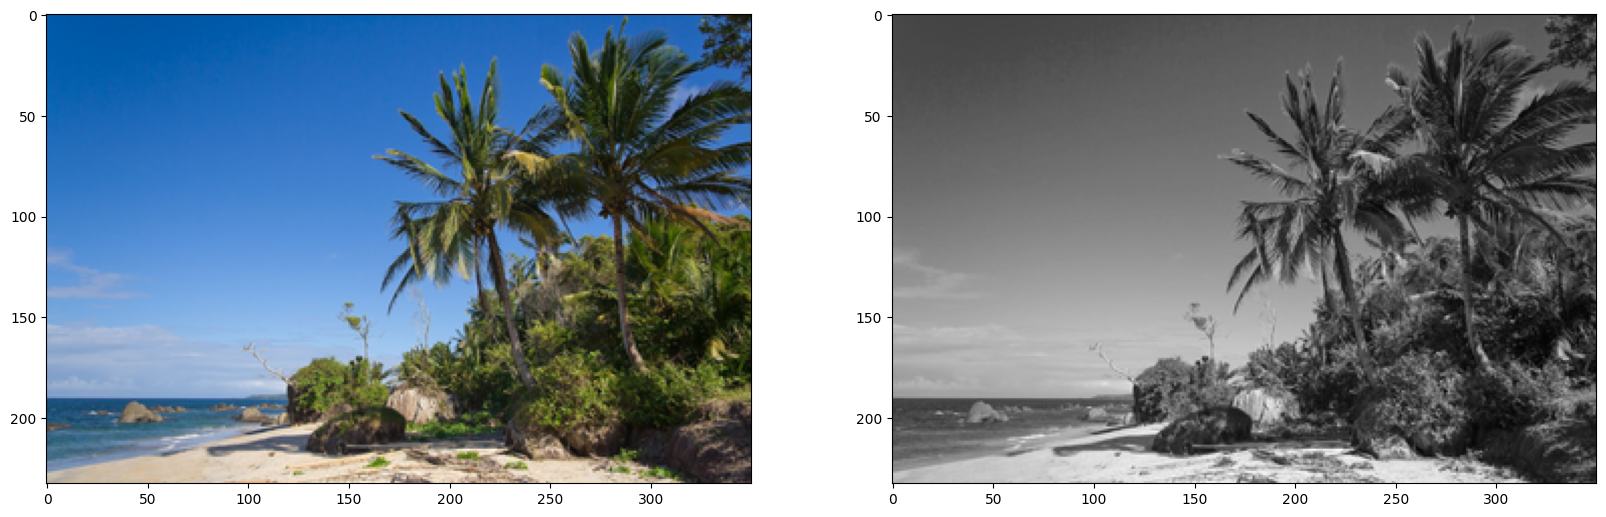

In [34]:
image = cv2.imread('/content/DL_Data_sets/images/beach.png')

image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(gray_image, cmap = 'gray')

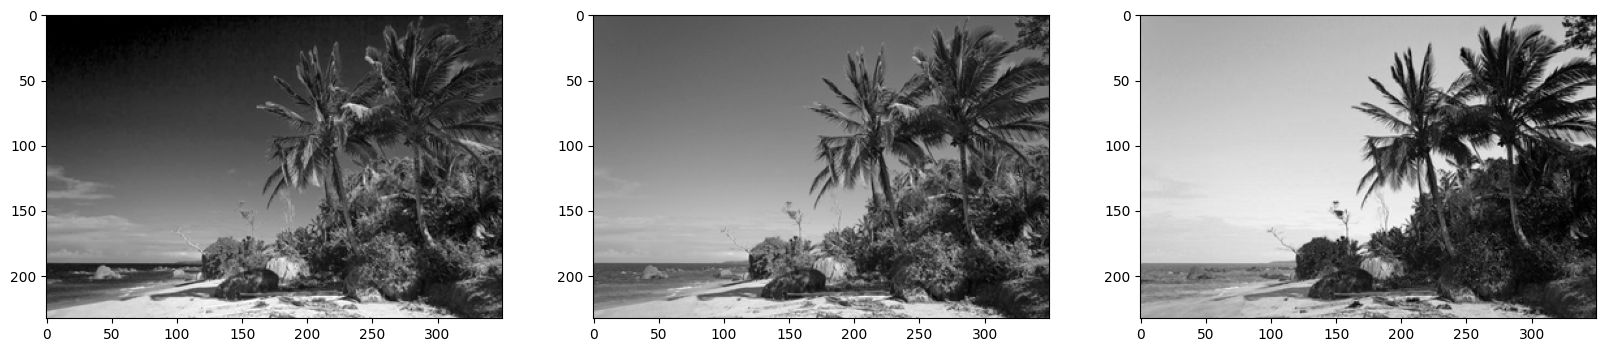

In [35]:
R, G, B = cv2.split(image)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(R, cmap='gray')
ax2.imshow(G, cmap = 'gray')
ax3.imshow(B, cmap = 'gray')

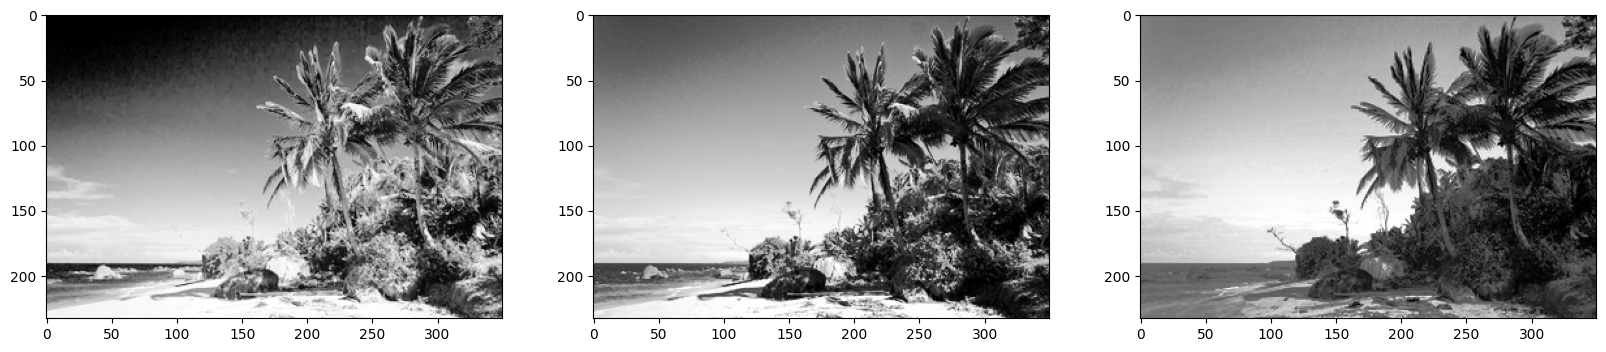

In [36]:
eq_R = cv2.equalizeHist(R)
eq_G = cv2.equalizeHist(G)
eq_B = cv2.equalizeHist(B)

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.imshow(eq_R, cmap='gray')
ax2.imshow(eq_G, cmap = 'gray')
ax3.imshow(eq_B, cmap = 'gray')

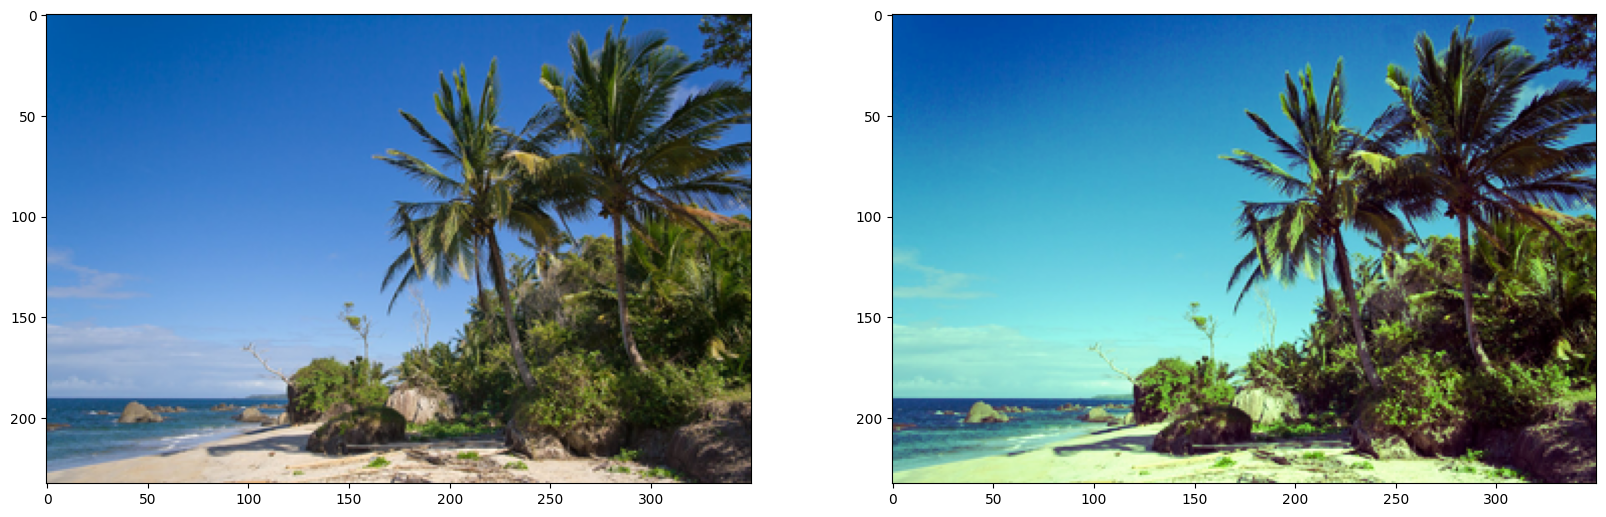

In [17]:
image_eq = cv2.merge([R, eq_G, B])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image)
ax2.imshow(image_eq)

Histogram Equalization is a powerful technique when applied to HSV images because it allows us to manipulate the individual color channels in a way that is intuitive and effective for human perception.

In RGB space, histogram equalization can be used to improve contrast by stretching or compressing the pixel values. However, this process does not take into account the semantic meaning of colors in an image. In HSV space, the hue channel represents the color information, which is more meaningful than just adjusting the brightness (value) or saturation.

When we apply histogram equalization to the hue channel of an HSV image, we are effectively "stretching" or "compressing" the color range to make it more even and balanced. This can be particularly useful for images with dominant colors, such as those taken under varying lighting conditions. By equalizing the hue channel, we can:

1. **Reduce color cast**: If an image has a dominant color tone that is not natural (e.g., due to uneven lighting), histogram equalization can help reduce this color cast by spreading out the hue values.
2. **Improve color contrast**: By making the color range more even and balanced, we can improve the overall color contrast in the image.
3. **Enhance color discrimination**: Histogram equalization can help make subtle color differences more pronounced, which is particularly useful for applications like object recognition or segmentation.

When we apply histogram equalization to the saturation channel of an HSV image, we are effectively adjusting the amount of color intensity in each pixel. In other words, we are manipulating how vibrant or muted each color is.

By equalizing the S channel, we can:

1. **Reduce color saturation**: If an image has overly saturated colors, histogram equalization can help reduce their vibrancy to make them more natural.
2. **Enhance subtle colors**: By spreading out the Saturation values, we can make subtle color differences more pronounced, which is useful for applications like object recognition or segmentation.
3. **Improve color harmony**: Equalizing the S channel can also help improve the overall color harmony in an image by making colors more consistent and balanced.

When we apply histogram equalization to the Value (V) channel of an HSV image, we are effectively adjusting the brightness or lightness of each pixel. In other words, we are manipulating how bright or dark each pixel is.

By equalizing the V channel, we can:

1. **Improve overall brightness**: If an image has a dominant brightness level that is not natural (e.g., due to uneven lighting), histogram equalization can help improve the overall brightness by spreading out the Value values.
2. **Enhance contrast**: By making the brightness range more even and balanced, we can improve the overall contrast in the image.
3. **Reduce noise**: Equalizing the V channel can also help reduce noise or artifacts in an image by making the brightness levels more consistent.

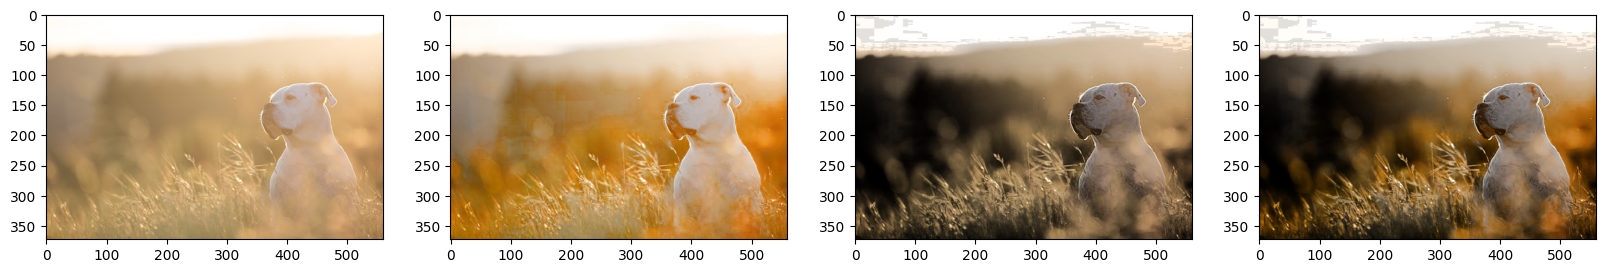

In [39]:
image_dog = cv2.imread('/content/DL_Data_sets/images/dog_contrast.jpeg')
image_dog = cv2.cvtColor(image_dog, cv2.COLOR_BGR2RGB)
image_hsv = cv2.cvtColor(image_dog, cv2.COLOR_RGB2HSV)

H, S, V = cv2.split(image_hsv)

eq_H = cv2.equalizeHist(H)
eq_S = cv2.equalizeHist(S)
eq_V = cv2.equalizeHist(V)

image_eq_s = cv2.merge([H, eq_S, V])
image_eq_v = cv2.merge([H, S, eq_V])
image_eq_sv = cv2.merge([H, eq_S, eq_V])
image_eq_s = cv2.cvtColor(image_eq_s, cv2.COLOR_HSV2RGB)
image_eq_v = cv2.cvtColor(image_eq_v, cv2.COLOR_HSV2RGB)
image_eq_sv = cv2.cvtColor(image_eq_sv, cv2.COLOR_HSV2RGB)

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.imshow(image_dog)
ax2.imshow(image_eq_s)
ax3.imshow(image_eq_v)
ax4.imshow(image_eq_sv)


# Challenge

Using the following algorithm, implement histogram equalization:

1. Calculate normalized histogram: Normalization is performed by dividing the frequency of each bin by the total number of pixels in the image.
2. Cumulative distribution function of the histogram: Find the cumulative sum of the normalized histogram:    $\sum_{i=0}^j P_x(i)$

    Where $P_x$ is the normalized histogram.

3. Derive intensity-mapping lookup table: Map the new pixel intensities to each pixel of the image. For each discrete intensity level i, the mapped pixel value is calculated from the normalized cumulative histogram according to:

    ```mapped_pixel_value(i) = (L-1)*normalized_cumulative_histogram(i)```

    Where L = 256 for a typical 8-bit unsigned integer representation of pixel intensity.

4. Transform pixel intensity of the original image with the lookup table: Create a new image based on the lookup table.

In [19]:
# TODO: Implment all the functions needed to perform histogram equalization.
#Test your functions on the following image.
#Plot the image, the equalized version of the image, and the histograms of both the original and the equalized image.

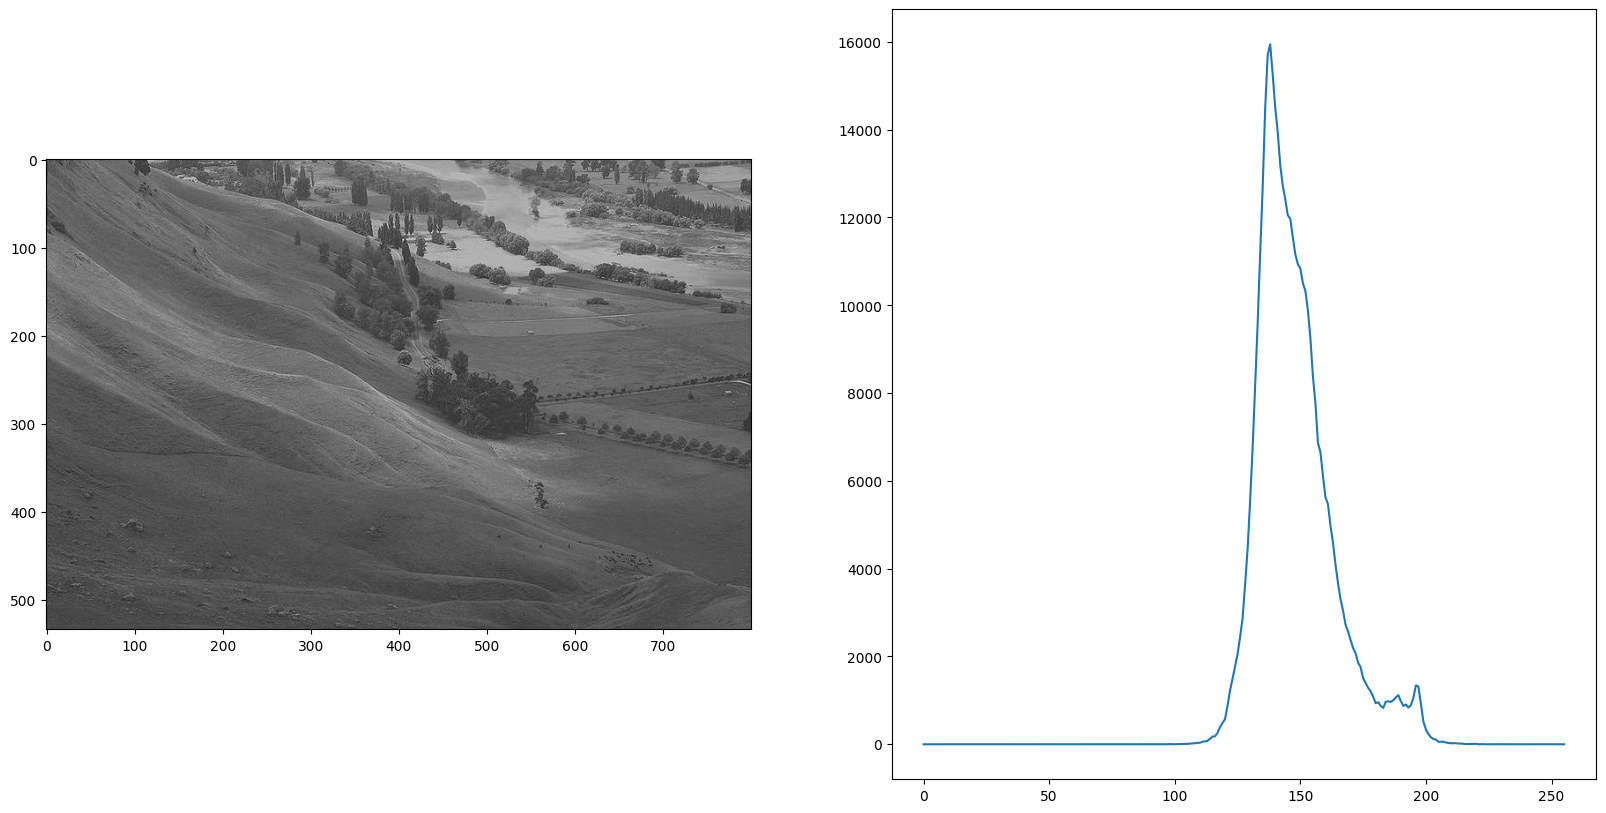

In [40]:
image = cv2.imread('/content/DL_Data_sets/images/Hawkes_Bay_NZ.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

hist = cv2.calcHist([image], [0], None, [256], [0, 256])

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.imshow(image, cmap='gray')
ax2.plot(hist)